#1

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

#2

In [5]:
wine = load_wine()
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
features = len(wine.feature_names)        
print("Number of features = ",features)         

Number of features =  13


#3

因為load_wine數據集中的特徵順序是固定的sckit-learn可能會對特徵順序做更改，而特徵名稱不會更改。
因此透過 wine.feature_names.index('想要的索引名稱) 來獲取特定名稱的索引絕不會出錯。

In [7]:
X = wine.data
y = wine.target
malic_acid_index = wine.feature_names.index('malic_acid')     #取得該特徵在索引中的所在位置
malic_acid_feature = X[:,malic_acid_index]  
malic_acid_feature                

array([1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87, 2.15, 1.64, 1.35, 2.16,
       1.48, 1.73, 1.73, 1.87, 1.81, 1.92, 1.57, 1.59, 3.1 , 1.63, 3.8 ,
       1.86, 1.6 , 1.81, 2.05, 1.77, 1.72, 1.9 , 1.68, 1.5 , 1.66, 1.83,
       1.53, 1.8 , 1.81, 1.64, 1.65, 1.5 , 3.99, 1.71, 3.84, 1.89, 3.98,
       1.77, 4.04, 3.59, 1.68, 2.02, 1.73, 1.73, 1.65, 1.75, 1.9 , 1.67,
       1.73, 1.7 , 1.97, 1.43, 0.94, 1.1 , 1.36, 1.25, 1.13, 1.45, 1.21,
       1.01, 1.17, 0.94, 1.19, 1.61, 1.51, 1.66, 1.67, 1.09, 1.88, 0.9 ,
       2.89, 0.99, 3.87, 0.92, 1.81, 1.13, 3.86, 0.89, 0.98, 1.61, 1.67,
       2.06, 1.33, 1.83, 1.51, 1.53, 2.83, 1.99, 1.52, 2.12, 1.41, 1.07,
       3.17, 2.08, 1.34, 2.45, 1.72, 1.73, 2.55, 1.73, 1.75, 1.29, 1.35,
       3.74, 2.43, 2.68, 0.74, 1.39, 1.51, 1.47, 1.61, 3.43, 3.43, 2.4 ,
       2.05, 4.43, 5.8 , 4.31, 2.16, 1.53, 2.13, 1.63, 4.3 , 1.35, 2.99,
       2.31, 3.55, 1.24, 2.46, 4.72, 5.51, 3.59, 2.96, 2.81, 2.56, 3.17,
       4.95, 3.88, 3.57, 5.04, 4.61, 3.24, 3.9 , 3.

In [8]:
magnesium_index = wine.feature_names.index('magnesium')
magnesium_feature = X[:,magnesium_index]
magnesium_feature

array([127., 100., 101., 113., 118., 112.,  96., 121.,  97.,  98., 105.,
        95.,  89.,  91., 102., 112., 120., 115., 108., 116., 126., 102.,
       101.,  95.,  96., 124.,  93.,  94., 107.,  96., 101., 106., 104.,
       132., 110., 100., 110.,  98.,  98., 128., 117.,  90., 101., 103.,
       107., 111., 102., 101., 103., 108.,  92.,  94., 111., 115., 118.,
       116., 118., 102., 108.,  88., 101., 100.,  94.,  87., 104.,  98.,
        78.,  78., 110., 151., 103.,  86.,  87., 139., 101.,  97.,  86.,
       112., 136., 101.,  86.,  86.,  78.,  85.,  94.,  99.,  90.,  88.,
        84.,  70.,  81.,  86.,  80.,  88.,  98., 162., 134.,  85.,  88.,
        88.,  97.,  88.,  98.,  86.,  85.,  90.,  80.,  84.,  92.,  94.,
       107.,  88., 103.,  88.,  84.,  85.,  86., 108.,  80.,  87.,  96.,
       119., 102.,  86.,  82.,  85.,  86.,  92.,  88.,  80., 122., 104.,
        98., 106.,  85.,  94.,  89.,  96.,  88., 101.,  96.,  89.,  97.,
        92., 112., 102.,  80.,  86.,  92., 113., 12

畫出malic_acidc和magnesium的散點圖

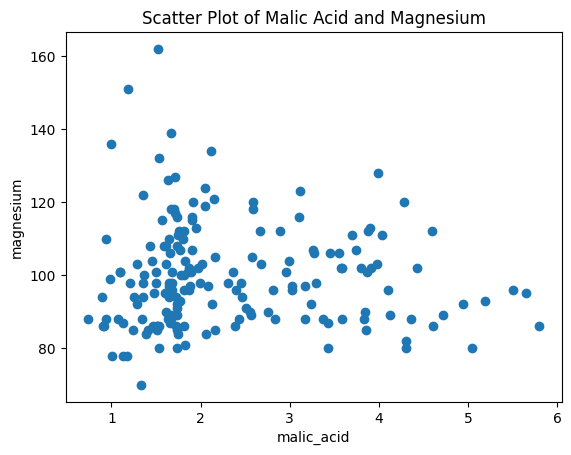

In [9]:
import matplotlib.pyplot as plt
plt.scatter(malic_acid_feature,magnesium_feature)
plt.xlabel('malic_acid')
plt.ylabel('magnesium')
plt.title('Scatter Plot of Malic Acid and Magnesium')
plt.show()

#4  找出最好的K值

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  

scores = []

for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i)

    #fitting the model  利用X、y的training data 去訓練KNN這個模型
    knn.fit(X_train,y_train)

    # predict the respond
    pred = knn.predict(X_test)    #將驗證集的X_test放入 訓練好的KNN model中，將結果存在pred變數中(為了等等評分用)

    #evaluate accuracy
    print('第{}次驗證分數 = '.format(i),accuracy_score(y_test,pred))    #將驗證集的y_test與將 (驗證集X_test經由X、y測試集丟入KNN中訓練好的模型裡的變數做比較)
    scores.append(float(accuracy_score(y_test,pred)))


第1次驗證分數 =  0.7407407407407407
第3次驗證分數 =  0.7407407407407407
第5次驗證分數 =  0.7037037037037037
第7次驗證分數 =  0.6481481481481481
第9次驗證分數 =  0.6851851851851852
第11次驗證分數 =  0.7037037037037037
第13次驗證分數 =  0.7037037037037037
第15次驗證分數 =  0.7037037037037037
第17次驗證分數 =  0.7407407407407407
第19次驗證分數 =  0.7222222222222222
第21次驗證分數 =  0.6666666666666666
第23次驗證分數 =  0.6851851851851852
第25次驗證分數 =  0.7037037037037037
第27次驗證分數 =  0.7222222222222222
第29次驗證分數 =  0.7407407407407407
第31次驗證分數 =  0.6851851851851852
第33次驗證分數 =  0.6666666666666666
第35次驗證分數 =  0.7222222222222222
第37次驗證分數 =  0.7037037037037037
第39次驗證分數 =  0.7037037037037037
第41次驗證分數 =  0.7037037037037037
第43次驗證分數 =  0.7222222222222222
第45次驗證分數 =  0.7222222222222222
第47次驗證分數 =  0.7222222222222222
第49次驗證分數 =  0.7222222222222222


In [18]:
scores

[0.7407407407407407,
 0.7407407407407407,
 0.7037037037037037,
 0.6481481481481481,
 0.6851851851851852,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037,
 0.7407407407407407,
 0.7222222222222222,
 0.6666666666666666,
 0.6851851851851852,
 0.7037037037037037,
 0.7222222222222222,
 0.7407407407407407,
 0.6851851851851852,
 0.6666666666666666,
 0.7222222222222222,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037,
 0.7222222222222222,
 0.7222222222222222,
 0.7222222222222222,
 0.7222222222222222]

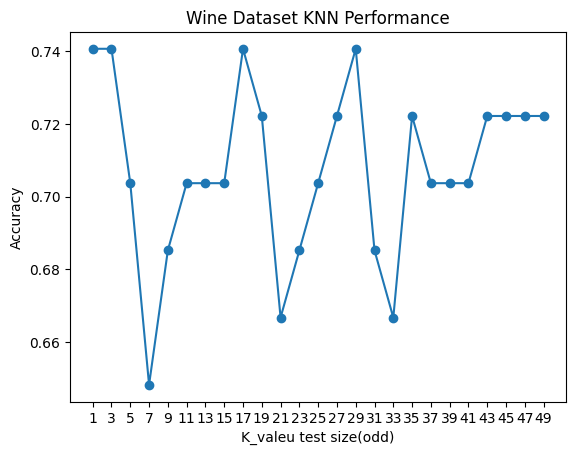

In [28]:
w = range(1,50,2)

plt.plot(w, scores, '-o')
plt.xlabel('K_valeu test size(odd)')
plt.ylabel('Accuracy')
plt.title('Wine Dataset KNN Performance')
plt.xticks(w)
plt.show()

從上圖可以看出，當k = 1, 3, 17, 29時，驗證分數會最高

#5 結果視覺化

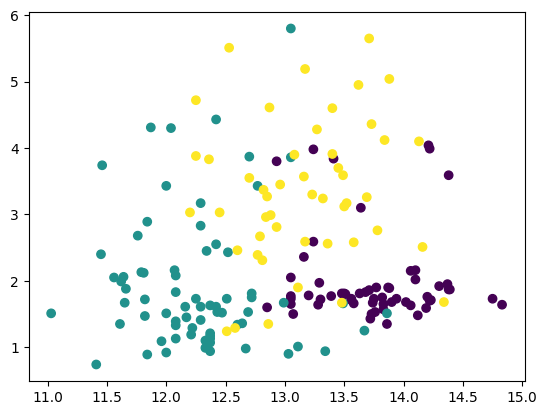

In [45]:
#創建KNN 模型
k = 1                       #已知1,3,17,29分數皆是最高且相同，選k=1去跑model就好
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)

plt.scatter(X[:, 0], X[:, 1], c=y)     #c是顏色標記分群，根據我們的target去區分

#6 驗證、評估模型準確率

In [51]:
from sklearn.model_selection import cross_val_score

scores_ = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')

scores_

array([0.69230769, 0.76923077, 0.76923077, 0.61538462, 0.58333333,
       0.83333333, 0.83333333, 0.75      , 0.66666667, 0.83333333])

In [55]:
print('模型最後評估的準確率為',round(max(scores_),3))

模型最後評估的準確率為 0.833
